# Hands-on-session 1: Nonlinear Sound Waves

In [13]:
##### This file contains some useful python code that
##### helps you to work through the exercise sheet.

### Time series analysis

In [14]:
# Import python packages
import pencil as pc  # the pencil code packages
import matplotlib.pyplot as plt   # for plotting the data

In [15]:
# Read in time series
ts = pc.read.ts(datadir='../data')

Read 227 lines.


In [16]:
# Pick out some quantities from the time series:
tt = ts.t       # simulation time 
ethm = ts.ethm  # mean thermal energy
ekin = ts.ekin  # mean kinetic energy
etot = ethm + ekin # total energy

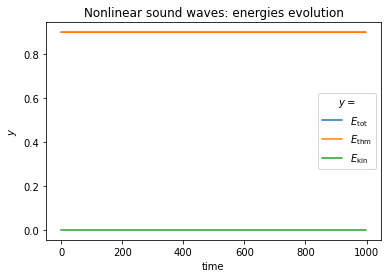

In [17]:
# Plot:
f = plt.figure()
 
plt.plot(tt,etot,label='$E_\\mathrm{tot}$')
plt.plot(tt,ethm,label='$E_\\mathrm{thm}$')
plt.plot(tt,ekin,label='$E_\\mathrm{kin}$')
 
plt.legend(loc='best', title='$y=$')
plt.ylabel('$y$')
plt.xlabel('time')
 
plt.title('Nonlinear sound waves: energies evolution')
 
f.savefig("plot_ts.pdf" , bbox_inches='tight')

### Analyse a specific snapshot

In [18]:
# Import python packages
import pencil as pc
import matplotlib.pyplot as plt   # for plotting the data

In [19]:
# Read in the initial var file:
var = pc.read.var(ivar=0,trimall=True, datadir='../data')   # "trimall" means that ghost cells will be removed automatically
# Extract some quanities:
x = var.x    # x position
lnrho = var.lnrho[0,0,:] # ln of density

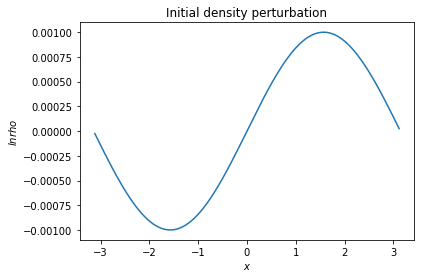

In [20]:
# Plot:
f = plt.figure()
 
plt.plot(x,lnrho)
 
plt.ylabel('$lnrho$')
plt.xlabel('$x$')
 
plt.title('Initial density perturbation')
 
f.savefig("lnrho_x.pdf" , bbox_inches='tight')

### Heatmap

In [21]:
# Import python packages
import pencil as pc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [22]:
# Total number of snapshots:
numberofvarfiles = len(open('../data/proc0/varN.list').readlines(  ))-1

In [23]:
# Collect all density snapshots:
lnrho = []
for i in range(0, numberofvarfiles, 10):
    var = pc.read.var(ivar=i,trimall=True, datadir='../data')  
    lnrho.append(var.lnrho[0,0,:])

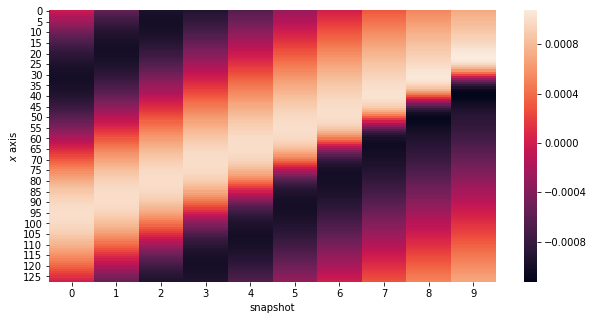

In [24]:
# create heat map:
# create figure environment:
f, ax = plt.subplots(figsize=(10,5))

sns.heatmap(np.transpose(lnrho), ax=ax)

plt.ylabel("$x$ axis")
plt.xlabel("snapshot")

f.savefig("snapshot_heatmap.pdf" , bbox_inches='tight')